In [1616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Let’s say we have a fictional dataset of pairs of variables, a mother and her daughter’s heights.
Create a CSV file for the above training data and write a Python function program to find the fitted linear
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the error, MSE and RMSE. Plot the graph Daughter height (Y-axis) vs Mother height
(X-axis) with blue colour. Also, plot the line of best fit with red colour. Predict her daughter’s height with
given a new mother height as 63. Plot the graph of error in y-axis and iteration in x-axis with 4 epochs (6x4=24
iterations).

In [1617]:
def cost(y_hat,y):
    return np.sqrt(np.mean((y_hat-y)**2))

In [1618]:
def linear(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    for iter in range(epoch):
        for i in range(len(X)):
            y_hat=b0+b1*X[i]
            costs.append(cost(y_hat,Y[i]))
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
    return b0,b1,costs

In [1619]:
df=pd.read_csv('height.csv')
df

,mother_height,daughter_height
0,55,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [1620]:
x=df['mother_height'].values
y=df['daughter_height'].values

In [1621]:
epoch=10
alpha=0.0001
b0,b1,costs=linear(x,y,epoch,alpha)

In [1622]:
y_pred=b0+b1*x
mae=rmse=np.mean(abs(y_pred-y))
mse=np.mean((y_pred-y)**2)
rmse=np.sqrt(np.mean((y_pred-y)**2))
print('mae',mae,'mse',mse,'rmse',rmse)

mae 2.9839580169826534 mse 10.763464276797665 rmse 3.280771902585985


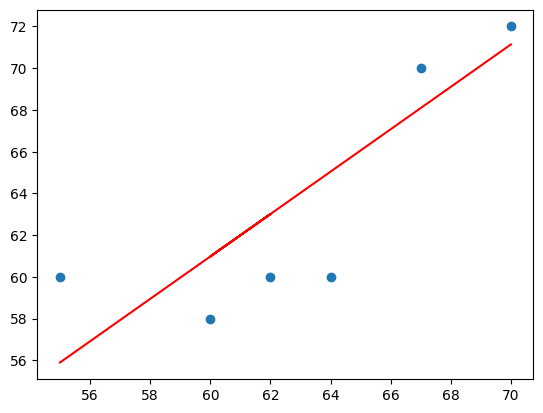

In [1623]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

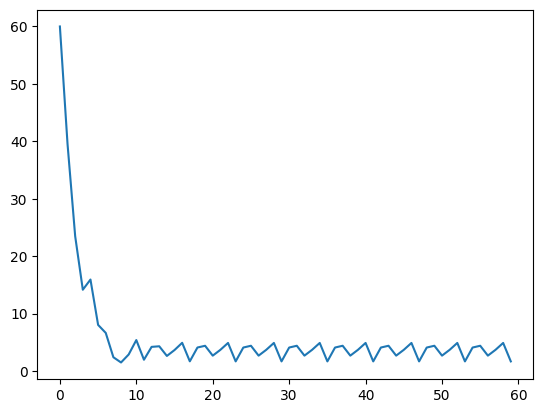

In [1624]:
plt.plot(range(epoch*len(x)),costs)

## sklearn

In [1625]:
from sklearn.linear_model import SGDRegressor

In [1626]:
sgd=SGDRegressor(max_iter=10,eta0=0.0001)
sgd.fit(x.reshape(-1,1),y.reshape(-1,1))
b0=sgd.intercept_
b1=sgd.coef_

y_pred=b0+b1*x

/home/ankur/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ankur/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [1627]:
mae=rmse=np.mean(abs(y_pred-y))
mse=np.mean((y_pred-y)**2)
rmse=np.sqrt(np.mean((y_pred-y)**2))
print('mae',mae,'mse',mse,'rmse',rmse)

mae 2.9943935613987933 mse 10.242982795762996 rmse 3.2004660279032797


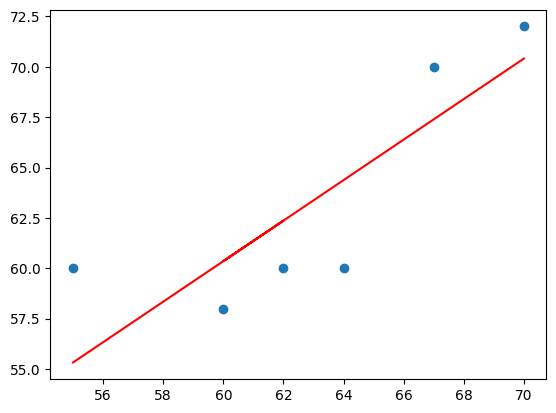

In [1628]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')

2. Create a CSV file for the above training data and write a Python function program to find the fitted logistic
regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction
= 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability
that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis
and iteration in x-axis with 3 epochs (8x3=24 iterations).

In [1629]:
def sigmoid(z):
    z = np.clip(z, -500, 500) 
    return 1/(1+np.exp(-z))

In [1630]:
def loss(y_hat, y):
    epsilon = 1e-10 
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return (-1 / len(y)) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


In [1631]:
def logistic(X,Y,epoch,alpha):
    b0=0
    b1=0
    costs=[]
    for iter in range(epoch):
        y_pred=[]
        for i in range(len(X)):
            z=b0+b1*X[i]
            y_hat=sigmoid(z)
            y_pred.append(y_hat)
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i]
        cost=loss(np.array(y_pred),y)
        if iter%100==0:
            print(f'Cost at {iter+1}:',cost)
        costs.append(cost)
        
    return b0,b1,costs

In [1632]:
df=pd.read_csv('pass.csv')
df

,Hours,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [1633]:
x=df['Hours'].values
y=df['Pass'].values

In [1634]:
epoch=500
alpha=0.01
b0,b1,costs=logistic(x,y,epoch,alpha)
print(f'\nb0: {b0} b1: {b1}')

Cost at 1: 0.6815258810980122
Cost at 101: 0.44581633167574025
Cost at 201: 0.35147888252398013
Cost at 301: 0.2964721228498481
Cost at 401: 0.26059956343949175

b0: -3.590247463361757 b1: 0.8974764921153755


In [1635]:
y_pred=b0+b1*x

In [1636]:
y_hot=(y_pred>=0.5).astype(int)
y_hot

array([0, 0, 0, 0, 1, 1, 1, 1])

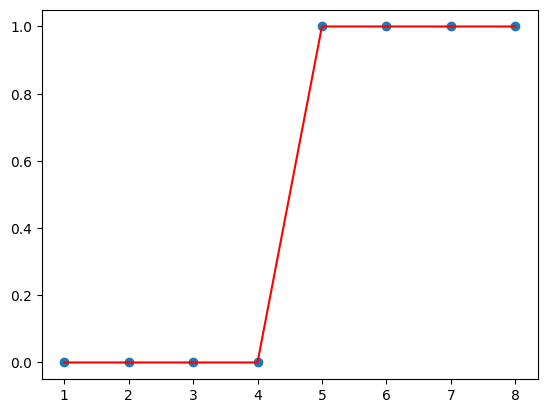

In [1637]:
plt.scatter(x,y)
plt.plot(x,y_hot.T,color='r')

In [1638]:
accuracy=np.mean(y_hot==y)*100
print(f'Accuracy = {accuracy} %')

Accuracy = 100.0 %


In [1639]:
y1=b0+b1*3.5
y2=b0+b1*7.5
print(f'3.5 hours: {y1}\n7.5 hours: {y2}') 

3.5 hours: -0.4490797409579428
7.5 hours: 3.140826227503559


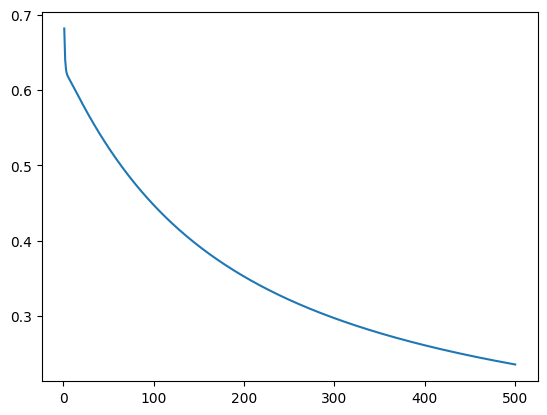

In [1640]:
plt.plot(range(1,epoch+1),costs)

## sklearn

In [1641]:
from sklearn.linear_model import LogisticRegression

In [1642]:
logreg=LogisticRegression()
logreg.fit(x.reshape(-1,1),y)
b0=logreg.intercept_[0]
b1=logreg.coef_[0][0]

y_pred=b0+b1*x
y_hot=(y_pred>=0.5).astype(int)
print(f'\nb0: {b0} b1: {b1}')


b0: -5.264107913297967 b1: 1.1697993675705602


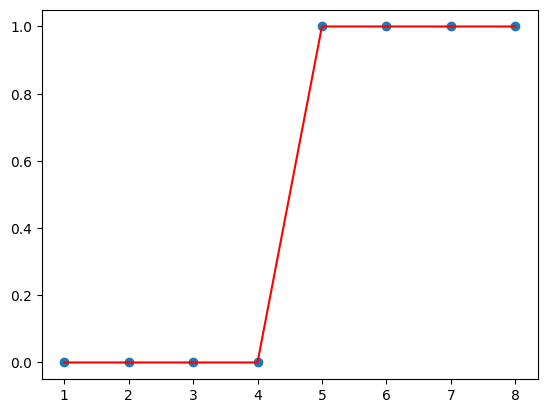

In [1643]:
plt.scatter(x,y)
plt.plot(x,y_hot.T,color='r')

In [1644]:
accuracy=np.mean(y_hot==y)*100
print(f'Accuracy = {accuracy} %')

Accuracy = 100.0 %


3. Consider  the  above  dataset  with  two  independent  variables  (X1  and  X2)  and  a  dependent  variable  (Y). 
Implement  in  python,  how  you  can  perform  the  logistic  regression  to  model  the  relationship  between  the 
independent variables and the dependent variable.

In [1645]:
df=pd.read_csv('q3.csv')
df

,x1,x2,y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [1646]:
x=df[['x1','x2']].values
y=df['y'].values
y=(y>0).astype(int)

In [1647]:
def multi_logistic(X,Y,epoch,alpha):
    b0=0
    b1=0
    b2=0
    costs=[]
    for iter in range(epoch):
        y_pred=[]
        for i in range(len(X)):
            z=b0+b1*X[i][0]+b2*X[i][1]
            y_hat=sigmoid(z)
            y_pred.append(y_hat)
            b0=b0-alpha*(y_hat-Y[i])
            b1=b1-alpha*(y_hat-Y[i])*X[i][0]
            b2=b2-alpha*(y_hat-Y[i])*X[i][1]
        cost=loss(np.array(y_pred),y)
        if iter%100==0:
            print(f'Cost at {iter+1}:',cost)
        costs.append(cost)
        
    return b0,b1,b2,costs

In [1648]:
epoch=500
alpha=0.01
b0,b1,b2,costs=multi_logistic(x,y,epoch,alpha)
print(f'\nb0: {b0} b1: {b1} b2: {b2}')

Cost at 1: 0.6470420901913175
Cost at 101: 0.19442431810395794
Cost at 201: 0.14400562829298064
Cost at 301: 0.11491549447444113
Cost at 401: 0.09520137791693703

b0: 0.7678373556252962 b1: 0.9620153247735796 b2: -2.5967721733049767


In [1649]:
y_pred=b0+b1*x[:,0]+b2*x[:,1]

In [1650]:
y_hot=(y_pred>=0.5).astype(int)
y_hot

array([1, 0, 1, 0, 0, 0])

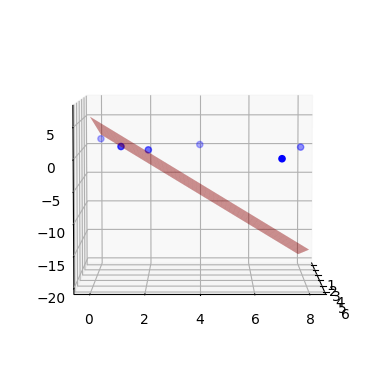

In [1651]:
ax = plt.axes(projection="3d")
ax.scatter(x[:, 0], x[:, 1], y, color="blue")

x1_val = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
x2_val = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)

x_axis, y_axis = np.meshgrid(x1_val, x2_val)
y_grid = b0 + b1 * x_axis + b2 * y_axis

ax.plot_surface(x_axis, y_axis, y_grid, color="red", alpha=0.5)
ax.view_init(elev=5,azim=0)

In [1652]:
accuracy=np.mean(y_hot==y)*100
print(f'Accuracy = {accuracy} %')

Accuracy = 100.0 %


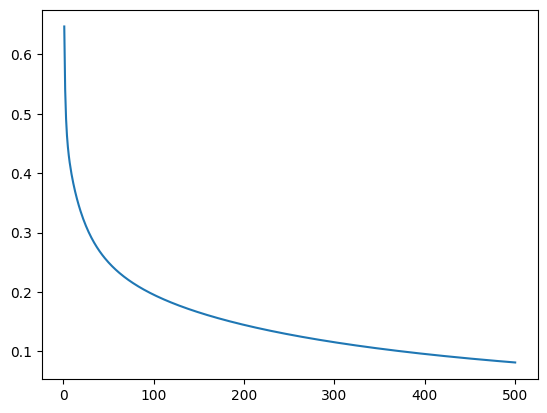

In [1653]:
plt.plot(range(1,epoch+1),costs)

### Additional Questions

In [1654]:
df=pd.read_csv('gold_price.csv')

In [1655]:
x=df['Year'].values
y=df['Price'].values

y_norm=(y>y.mean()).astype(int)

In [1656]:
b0,b1,costs=logistic(x,y_norm,1000,0.001)

Cost at 1: -130337.81662451783
Cost at 101: -109316.81466610625
Cost at 201: -109316.81466610625
Cost at 301: -109316.81466610625
Cost at 401: -109316.81466610625
Cost at 501: -109316.81466610625
Cost at 601: -109316.81466610625
Cost at 701: -109316.81466610625
Cost at 801: -109316.81466610625
Cost at 901: -109316.81466610625


In [1657]:
y_pred=b0+b1*x
y_hot=(y_pred>=0.5).astype(int)
y_hot

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

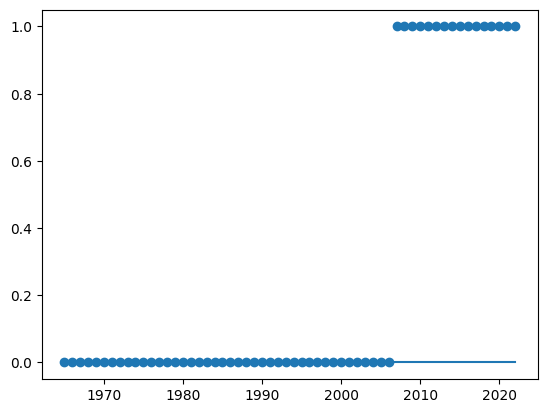

In [1658]:
plt.scatter(x,y_norm)
plt.plot(x,y_hot)

In [1659]:
accuracy=np.mean(y_hot==y_norm)*100
print(f'Accuracy = {accuracy} %')

Accuracy = 72.41379310344827 %


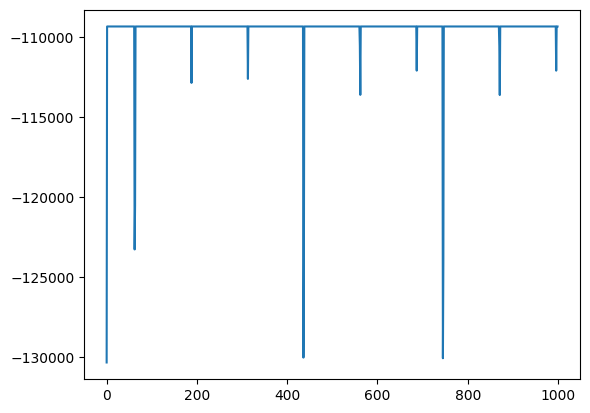

In [1660]:
plt.plot(range(len(costs)),costs)